## Part 1: Data Preprocessing 

In [1]:
import pandas as pd
from pickle import load
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import random
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the required library
import pandas as pd

# Read the training data from the CSV file into a DataFrame
trainDF = pd.read_csv("trainingData.csv")

# Read the validation data from the CSV file into a DataFrame
validDF = pd.read_csv('validationData.csv')

# Display the first five rows of the training data to get an overview
trainDF.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [3]:
# Combine the training and validation DataFrames into a single DataFrame 
# and reset the index to ensure it runs sequentially

combined_df = pd.concat([trainDF, validDF], ignore_index=True)


In [4]:
# Shuffle the combined DataFrame to ensure random distribution of data
# The random_state ensures reproducibility, and reset_index reorganizes the index after shuffling
new_df = combined_df.sample(frac=1, random_state=67).reset_index(drop=True)


In [5]:
# Combine 'BUILDINGID' and 'FLOOR' into a new 'BUILDING_FLOOR' column
new_df['BUILDING_FLOOR'] = (new_df['BUILDINGID'].astype(str) + new_df['FLOOR'].astype(str))

In [6]:
# X contains 520 features and Y contains the target
X = new_df.iloc[:,0:520] 
y = new_df['BUILDING_FLOOR']

# Perform stratified sampling for validation and test sets (balance class and reproducibility)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=73)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=73)

## Part 2: Model Performance 

In [7]:
# Cross-Validation for Logistic Regression

# Standardize the training data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Conduct 10-fold cross-validation on the standardized data
cv_scores = cross_val_score(logistic_model, X_train_standardized, y_train, cv=10, scoring='accuracy')

# Display the accuracy scores from the cross-validation
print('Accuracy:', cv_scores)


Accuracy: [0.92339667 0.9412114  0.9388361  0.93349169 0.93764846 0.93230404
 0.94477435 0.93052257 0.93642305 0.92869875]


In [8]:
# Logistic Regression Model Evaluation

# Standardize the validation data using the same scaler as the training data
X_val_standardized = scaler.transform(X_val)

# Train the logistic regression model
logistic_model.fit(X_train_standardized, y_train)

# Make predictions on the validation set
y_pred = logistic_model.predict(X_val_standardized)

# Evaluate and display the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Display detailed performance metrics
print("Classification Report:")
print(classification_report(y_val, y_pred))


Accuracy: 0.934916864608076
Classification Report:
              precision    recall  f1-score   support

          00       0.90      0.91      0.91       113
          01       0.92      0.90      0.91       157
          02       0.91      0.91      0.91       161
          03       0.93      0.94      0.93       147
          10       0.95      0.94      0.95       140
          11       0.95      0.95      0.95       163
          12       0.94      0.95      0.95       149
          13       0.92      0.94      0.93       100
          20       0.97      0.95      0.96       196
          21       0.93      0.93      0.93       227
          22       0.92      0.92      0.92       163
          23       0.94      0.96      0.95       275
          24       0.94      0.90      0.92       114

    accuracy                           0.93      2105
   macro avg       0.93      0.93      0.93      2105
weighted avg       0.93      0.93      0.93      2105



In [9]:
# Grid Search for Optimal K in KNN

# Define range of k values to test
k_values = list(range(3, 10)) + list(range(10, 130, 5))

# Set the grid of parameters
param_grid = {'n_neighbors': k_values}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Configure GridSearchCV with KNN, the parameter grid, and 10-fold CV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=10)

# Run the grid search
grid_search.fit(X_train_standardized, y_train)

# Display the optimal number of neighbors
print("Best n_neighbors:", grid_search.best_params_)


Best n_neighbors: {'n_neighbors': 3}


In [10]:
# Cross Validation

# Define the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Perform 10-fold cross-validation (you can change the number of folds with the cv parameter)
cv_scores = cross_val_score(knn_classifier, X_train_standardized, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)

Cross-Validation Scores: [0.92102138 0.93527316 0.93467933 0.93646081 0.92874109 0.93467933
 0.93824228 0.94002375 0.93166964 0.94177065]
Mean Accuracy: 0.9342561425347509
Standard Deviation: 0.005693331627922446


In [11]:
# KNN

# Fit the classifier to the training data
knn.fit(X_train_standardized, y_train)

# Predict the labels for the validation set
y_pred = knn.predict(X_val_standardized)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.9315914489311163
Classification Report:
              precision    recall  f1-score   support

          00       0.85      0.94      0.89       113
          01       0.87      0.90      0.88       157
          02       0.89      0.81      0.85       161
          03       0.91      0.88      0.90       147
          10       0.95      0.96      0.96       140
          11       0.96      0.95      0.96       163
          12       0.94      0.93      0.94       149
          13       0.91      0.89      0.90       100
          20       0.95      0.99      0.97       196
          21       0.95      0.94      0.95       227
          22       0.94      0.93      0.93       163
          23       0.96      0.96      0.96       275
          24       0.98      0.96      0.97       114

    accuracy                           0.93      2105
   macro avg       0.93      0.93      0.93      2105
weighted avg       0.93      0.93      0.93      2105



In [12]:
# Cross-Validation for Support Vector Classifier (SVC)

# Initialize the SVC model
svc_model = SVC()

# Conduct 10-fold cross-validation on standardized data
cv_scores = cross_val_score(svc_model, X_train_standardized, y_train, cv=10, scoring='accuracy')

# Display individual accuracy scores
print('Accuracy:', cv_scores)

# Compute and display the mean and standard deviation of accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation:', std_accuracy)


Accuracy: [0.94893112 0.94477435 0.95368171 0.94536817 0.94239905 0.94655582
 0.95071259 0.95427553 0.94592989 0.94652406]
Mean Accuracy: 0.9479152288569643
Standard Deviation: 0.00370228085361331


In [13]:
# Support Vector Classification (SVC) model

# Fit the model on the training data
svc_model.fit(X_train_standardized, y_train)

# Predict on the validation data
y_pred = svc_model.predict(X_val_standardized)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
# Print a classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.9410926365795724
Classification Report:
              precision    recall  f1-score   support

          00       0.91      0.92      0.92       113
          01       0.92      0.89      0.91       157
          02       0.86      0.95      0.90       161
          03       0.96      0.90      0.93       147
          10       0.98      0.94      0.96       140
          11       0.92      0.98      0.95       163
          12       0.95      0.94      0.94       149
          13       0.96      0.89      0.92       100
          20       0.94      0.97      0.96       196
          21       0.96      0.93      0.94       227
          22       0.93      0.93      0.93       163
          23       0.96      0.99      0.97       275
          24       1.00      0.92      0.96       114

    accuracy                           0.94      2105
   macro avg       0.94      0.94      0.94      2105
weighted avg       0.94      0.94      0.94      2105



## Part 3: Experimentations

In [14]:
# 20%

# Set the random seed to ensure reproducibility of random processes
random.seed(42)

# Convert the features and target values from training set to lists
train_x = list(X_train_standardized)
train_y = list(y_train)


# Calculate 20% of the data length
twenty_percent = int(0.2 * len(train_x))

# Get the indices of 20% of the data points randomly
random_indices = random.sample(range(len(train_x)), twenty_percent)

# Select corresponding data points from train_x and train_y using random indices
train20_x = [train_x[i] for i in random_indices]
train20_y = [train_y[i] for i in random_indices]
print('Length of 20% dataset:',len(train20_x))
print('Length of full dataset:', len(X_train))

Length of 20% dataset: 3367
Length of full dataset: 16838


In [15]:
# Logistic Regression

# Standardize test set
X_test_standardized = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_model2 = LogisticRegression()

# Fit the model on 20% of training data
logistic_model2.fit(train20_x, train20_y)

# Predict on the test data
y_pred = logistic_model2.predict(X_test_standardized)

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8921615201900237
Classification Report:
              precision    recall  f1-score   support

          00       0.92      0.85      0.88       114
          01       0.86      0.90      0.88       156
          02       0.82      0.83      0.83       161
          03       0.86      0.84      0.85       148
          10       0.91      0.93      0.92       140
          11       0.88      0.89      0.88       162
          12       0.90      0.88      0.89       148
          13       0.89      0.86      0.87        99
          20       0.92      0.97      0.95       197
          21       0.90      0.89      0.90       228
          22       0.85      0.83      0.84       163
          23       0.94      0.93      0.93       275
          24       0.94      0.95      0.94       114

    accuracy                           0.89      2105
   macro avg       0.89      0.89      0.89      2105
weighted avg       0.89      0.89      0.89      2105



In [16]:
# KNN

# Initialize the KNN classifier
knn2 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the 20% of training data
knn2.fit(train20_x, train20_y)

# Predict the labels for the test set
y_pred = knn2.predict(X_test_standardized)

# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8731591448931116
Classification Report:
              precision    recall  f1-score   support

          00       0.80      0.87      0.84       114
          01       0.79      0.80      0.79       156
          02       0.75      0.68      0.71       161
          03       0.79      0.81      0.80       148
          10       0.88      0.96      0.91       140
          11       0.93      0.88      0.90       162
          12       0.94      0.86      0.90       148
          13       0.84      0.93      0.88        99
          20       0.89      0.98      0.93       197
          21       0.86      0.92      0.89       228
          22       0.90      0.80      0.85       163
          23       0.96      0.92      0.94       275
          24       0.98      0.91      0.95       114

    accuracy                           0.87      2105
   macro avg       0.87      0.87      0.87      2105
weighted avg       0.87      0.87      0.87      2105



In [17]:
# SVC
# Initialize the SVC model
svc_model2 = SVC()
# Fit the classifier to the 20% of training data
svc_model2.fit(train20_x, train20_y)

# Predict on the test data
y_pred = svc_model2.predict(X_test_standardized)

# Calculate accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9045130641330166
Classification Report:
              precision    recall  f1-score   support

          00       0.92      0.84      0.88       114
          01       0.88      0.86      0.87       156
          02       0.68      0.83      0.75       161
          03       0.83      0.84      0.83       148
          10       0.98      0.91      0.94       140
          11       0.89      0.93      0.91       162
          12       0.92      0.91      0.92       148
          13       0.94      0.90      0.92        99
          20       0.95      0.98      0.97       197
          21       0.94      0.93      0.93       228
          22       0.95      0.83      0.89       163
          23       0.94      0.97      0.96       275
          24       1.00      0.92      0.96       114

    accuracy                           0.90      2105
   macro avg       0.91      0.90      0.90      2105
weighted avg       0.91      0.90      0.91      2105



In [18]:
# Get the average acuracy of three models for 20% of data
average_score_exp1 = (accuracy1+accuracy2+accuracy3)/3

In [19]:
# 40%

# Set the random seed to ensure reproducibility of random processes
random.seed(42)

# Calculate 40% of the data length
forty_percent = int(0.4 * len(train_x))

# Get the indices of 40% of the data points randomly
random_indices = random.sample(range(len(train_x)), forty_percent)

# Select corresponding data points from train_x and train_y using random indices
train40_x = [train_x[i] for i in random_indices]
train40_y = [train_y[i] for i in random_indices]
print('Length of 40% dataset:',len(train40_x))
print('Length of full dataset:', len(X_train))

Length of 40% dataset: 6735
Length of full dataset: 16838


In [20]:
# Logistic Regression

# Initialize the logistic regression model
logistic_model3 = LogisticRegression()

# Fit the model on the 40% of training data
logistic_model3.fit(train40_x, train40_y)

# Predict on the test data
y_pred = logistic_model3.predict(X_test_standardized)

# Calculate accuracy
accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy4)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9187648456057007
Classification Report:
              precision    recall  f1-score   support

          00       0.88      0.92      0.90       114
          01       0.91      0.88      0.90       156
          02       0.86      0.84      0.85       161
          03       0.87      0.89      0.88       148
          10       0.92      0.94      0.93       140
          11       0.91      0.89      0.90       162
          12       0.93      0.92      0.92       148
          13       0.88      0.94      0.91        99
          20       0.95      0.96      0.96       197
          21       0.95      0.93      0.94       228
          22       0.94      0.91      0.93       163
          23       0.96      0.95      0.95       275
          24       0.92      0.96      0.94       114

    accuracy                           0.92      2105
   macro avg       0.91      0.92      0.92      2105
weighted avg       0.92      0.92      0.92      2105



In [21]:
# KNN

# Initialize the KNN classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the 40% of training data
knn3.fit(train40_x, train40_y)

# Predict the labels for the test set
y_pred = knn3.predict(X_test_standardized)

# Calculate accuracy
accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy5)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9021377672209027
Classification Report:
              precision    recall  f1-score   support

          00       0.82      0.93      0.87       114
          01       0.86      0.85      0.85       156
          02       0.83      0.74      0.78       161
          03       0.84      0.86      0.85       148
          10       0.89      0.98      0.93       140
          11       0.97      0.88      0.92       162
          12       0.97      0.89      0.93       148
          13       0.85      1.00      0.92        99
          20       0.95      0.95      0.95       197
          21       0.89      0.90      0.90       228
          22       0.91      0.83      0.87       163
          23       0.94      0.95      0.95       275
          24       0.99      0.97      0.98       114

    accuracy                           0.90      2105
   macro avg       0.90      0.90      0.90      2105
weighted avg       0.90      0.90      0.90      2105



In [22]:
# SVC

svc_model3 = SVC()
svc_model3.fit(train40_x, train40_y)

# Predict on the test data
y_pred = svc_model3.predict(X_test_standardized)

# Calculate accuracy
accuracy6 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy6)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9339667458432304
Classification Report:
              precision    recall  f1-score   support

          00       0.91      0.93      0.92       114
          01       0.94      0.88      0.91       156
          02       0.77      0.90      0.83       161
          03       0.90      0.88      0.89       148
          10       0.96      0.96      0.96       140
          11       0.97      0.93      0.95       162
          12       0.95      0.95      0.95       148
          13       0.90      0.97      0.93        99
          20       0.97      0.97      0.97       197
          21       0.94      0.93      0.94       228
          22       0.97      0.86      0.91       163
          23       0.96      0.99      0.98       275
          24       1.00      0.95      0.97       114

    accuracy                           0.93      2105
   macro avg       0.93      0.93      0.93      2105
weighted avg       0.94      0.93      0.93      2105



In [23]:
# Get the average acuracy of three models for 40% of data
average_score_exp2 = (accuracy4+accuracy5+accuracy6)/3

In [24]:
# 60%
random.seed(42)

# Calculate 60% of the data length
sixty_percent = int(0.6 * len(train_x))

# Get the indices of 60% of the data points randomly
random_indices = random.sample(range(len(train_x)), sixty_percent)

# Select corresponding data points from train_x and train_y using random indices
train60_x = [train_x[i] for i in random_indices]
train60_y = [train_y[i] for i in random_indices]
print('Length of 60% dataset:',len(train60_x))
print('Length of full dataset:', len(X_train))

Length of 60% dataset: 10102
Length of full dataset: 16838


In [25]:
# Logistic Regression

# Initialize the logistic regression model
logistic_model4 = LogisticRegression()

# Fit the model on the 60% of training data
logistic_model4.fit(train60_x, train60_y)

# Predict on the test data
y_pred = logistic_model4.predict(X_test_standardized)

# Calculate accuracy
accuracy7 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy7)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.918289786223278
Classification Report:
              precision    recall  f1-score   support

          00       0.88      0.93      0.91       114
          01       0.91      0.87      0.89       156
          02       0.86      0.83      0.84       161
          03       0.86      0.91      0.88       148
          10       0.94      0.93      0.94       140
          11       0.92      0.91      0.91       162
          12       0.91      0.94      0.93       148
          13       0.87      0.92      0.89        99
          20       0.95      0.96      0.96       197
          21       0.95      0.93      0.94       228
          22       0.92      0.90      0.91       163
          23       0.96      0.94      0.95       275
          24       0.91      0.96      0.94       114

    accuracy                           0.92      2105
   macro avg       0.91      0.92      0.91      2105
weighted avg       0.92      0.92      0.92      2105



In [26]:
# KNN

# Initialize the KNN classifier
knn4 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the 60% of training data
knn4.fit(train60_x, train60_y)

# Predict the labels for the test set
y_pred = knn4.predict(X_test_standardized)

# Calculate accuracy
accuracy8 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy8)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9220902612826604
Classification Report:
              precision    recall  f1-score   support

          00       0.86      0.93      0.89       114
          01       0.87      0.89      0.88       156
          02       0.89      0.75      0.81       161
          03       0.84      0.91      0.87       148
          10       0.88      0.98      0.93       140
          11       0.97      0.88      0.92       162
          12       0.95      0.89      0.92       148
          13       0.87      0.99      0.92        99
          20       0.96      0.96      0.96       197
          21       0.94      0.94      0.94       228
          22       0.92      0.88      0.90       163
          23       0.97      0.97      0.97       275
          24       1.00      1.00      1.00       114

    accuracy                           0.92      2105
   macro avg       0.92      0.92      0.92      2105
weighted avg       0.92      0.92      0.92      2105



In [27]:
# SVC

svc_model4 = SVC()
svc_model4.fit(train60_x, train60_y)

# Predict on the test data
y_pred = svc_model4.predict(X_test_standardized)

# Calculate accuracy
accuracy9 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy9)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9420427553444181
Classification Report:
              precision    recall  f1-score   support

          00       0.93      0.94      0.93       114
          01       0.95      0.91      0.93       156
          02       0.80      0.90      0.85       161
          03       0.90      0.89      0.89       148
          10       0.97      0.96      0.97       140
          11       0.96      0.94      0.95       162
          12       0.95      0.95      0.95       148
          13       0.90      0.96      0.93        99
          20       0.97      0.97      0.97       197
          21       0.96      0.95      0.95       228
          22       0.98      0.89      0.93       163
          23       0.97      1.00      0.98       275
          24       1.00      0.95      0.97       114

    accuracy                           0.94      2105
   macro avg       0.94      0.94      0.94      2105
weighted avg       0.94      0.94      0.94      2105



In [28]:
# Get the average acuracy of three models for 60% of data
average_score_exp3 = (accuracy7+accuracy8+accuracy9)/3

In [29]:
# 80%
random.seed(42)

# Calculate 80% of the data length
eighty_percent = int(0.8 * len(train_x))

# Get the indices of 80% of the data points randomly
random_indices = random.sample(range(len(train_x)), eighty_percent)

# Select corresponding data points from train_x and train_y using random indices
train80_x = [train_x[i] for i in random_indices]
train80_y = [train_y[i] for i in random_indices]
print('Length of 80% dataset:',len(train80_x))
print('Length of full dataset:', len(X_train))

Length of 80% dataset: 13470
Length of full dataset: 16838


In [30]:
# Logistic Regression

# Initialize the logistic regression model
logistic_model5 = LogisticRegression()

# Fit the model on the 80% of training data
logistic_model5.fit(train80_x, train80_y)

# Predict on the test data
y_pred = logistic_model5.predict(X_test_standardized)

# Calculate accuracy
accuracy10 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy10)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9258907363420428
Classification Report:
              precision    recall  f1-score   support

          00       0.91      0.91      0.91       114
          01       0.90      0.90      0.90       156
          02       0.86      0.83      0.84       161
          03       0.86      0.90      0.88       148
          10       0.95      0.95      0.95       140
          11       0.94      0.92      0.93       162
          12       0.93      0.95      0.94       148
          13       0.88      0.94      0.91        99
          20       0.96      0.97      0.96       197
          21       0.96      0.94      0.95       228
          22       0.94      0.91      0.93       163
          23       0.96      0.95      0.96       275
          24       0.91      0.96      0.93       114

    accuracy                           0.93      2105
   macro avg       0.92      0.92      0.92      2105
weighted avg       0.93      0.93      0.93      2105



In [31]:
# KNN

# Initialize the KNN classifier
knn5 = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the 80% of training data
knn5.fit(train80_x, train80_y)

# Predict the labels for the test set
y_pred = knn5.predict(X_test_standardized)

# Calculate accuracy
accuracy11 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy11)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9315914489311163
Classification Report:
              precision    recall  f1-score   support

          00       0.87      0.94      0.90       114
          01       0.89      0.90      0.89       156
          02       0.90      0.83      0.86       161
          03       0.89      0.91      0.90       148
          10       0.91      0.98      0.94       140
          11       0.98      0.91      0.94       162
          12       0.94      0.93      0.94       148
          13       0.88      0.99      0.93        99
          20       0.97      0.96      0.96       197
          21       0.93      0.94      0.94       228
          22       0.93      0.88      0.91       163
          23       0.96      0.98      0.97       275
          24       1.00      0.99      1.00       114

    accuracy                           0.93      2105
   macro avg       0.93      0.93      0.93      2105
weighted avg       0.93      0.93      0.93      2105



In [32]:
# SVC

svc_model5 = SVC()
svc_model5.fit(train80_x, train80_y)

# Predict on the test data
y_pred = svc_model5.predict(X_test_standardized)

# Calculate accuracy
accuracy12 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy12)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9467933491686461
Classification Report:
              precision    recall  f1-score   support

          00       0.92      0.94      0.93       114
          01       0.96      0.91      0.93       156
          02       0.82      0.91      0.86       161
          03       0.91      0.91      0.91       148
          10       0.99      0.97      0.98       140
          11       0.96      0.95      0.96       162
          12       0.95      0.95      0.95       148
          13       0.90      0.96      0.93        99
          20       0.96      0.98      0.97       197
          21       0.97      0.94      0.96       228
          22       0.98      0.89      0.93       163
          23       0.97      1.00      0.98       275
          24       1.00      0.96      0.98       114

    accuracy                           0.95      2105
   macro avg       0.95      0.94      0.94      2105
weighted avg       0.95      0.95      0.95      2105



In [33]:
# Get the average acuracy of three models for 80% of data
average_score_exp4 = (accuracy10+accuracy11+accuracy12)/3

In [34]:
# 100%

# Logistic Model

# Predict the labels for the test set with model validated for 100% train data
y_pred = logistic_model.predict(X_test_standardized)

# Calculate accuracy
accuracy13 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy13)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9377672209026128
Classification Report:
              precision    recall  f1-score   support

          00       0.92      0.95      0.94       114
          01       0.93      0.91      0.92       156
          02       0.88      0.87      0.87       161
          03       0.89      0.91      0.90       148
          10       0.94      0.94      0.94       140
          11       0.94      0.91      0.92       162
          12       0.94      0.95      0.95       148
          13       0.90      0.95      0.92        99
          20       0.96      0.97      0.97       197
          21       0.97      0.95      0.96       228
          22       0.95      0.93      0.94       163
          23       0.96      0.97      0.97       275
          24       0.94      0.96      0.95       114

    accuracy                           0.94      2105
   macro avg       0.93      0.94      0.93      2105
weighted avg       0.94      0.94      0.94      2105



In [35]:
# KNN

# Predict the labels for the test set with model validated for 100% train data
y_pred = knn.predict(X_test_standardized)

# Calculate accuracy
accuracy14 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy14)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9344418052256532
Classification Report:
              precision    recall  f1-score   support

          00       0.87      0.96      0.91       114
          01       0.89      0.90      0.89       156
          02       0.92      0.81      0.86       161
          03       0.89      0.92      0.91       148
          10       0.93      0.98      0.95       140
          11       0.97      0.92      0.95       162
          12       0.94      0.93      0.94       148
          13       0.93      0.96      0.95        99
          20       0.93      0.98      0.96       197
          21       0.94      0.93      0.94       228
          22       0.94      0.90      0.92       163
          23       0.97      0.97      0.97       275
          24       1.00      0.99      1.00       114

    accuracy                           0.93      2105
   macro avg       0.93      0.93      0.93      2105
weighted avg       0.94      0.93      0.93      2105



In [36]:
# SVC

y_pred = svc_model.predict(X_test_standardized)

# Calculate accuracy
accuracy15 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy15)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9458432304038005
Classification Report:
              precision    recall  f1-score   support

          00       0.92      0.94      0.93       114
          01       0.95      0.90      0.92       156
          02       0.81      0.91      0.86       161
          03       0.92      0.91      0.92       148
          10       0.98      0.96      0.97       140
          11       0.96      0.94      0.95       162
          12       0.95      0.95      0.95       148
          13       0.94      0.93      0.93        99
          20       0.95      0.99      0.97       197
          21       0.97      0.94      0.96       228
          22       0.98      0.90      0.94       163
          23       0.97      1.00      0.98       275
          24       1.00      0.96      0.98       114

    accuracy                           0.95      2105
   macro avg       0.95      0.94      0.94      2105
weighted avg       0.95      0.95      0.95      2105



In [37]:
# Get the average acuracy of three models for 100% of data
average_score_exp5 = (accuracy13+accuracy14+accuracy15)/3

In [38]:
# List of average scores from experiments
avg_list = [average_score_exp1, average_score_exp2, average_score_exp3, average_score_exp4, average_score_exp5]

# Round the numbers in the list to 2 decimal places
rounded_numbers = [round(num, 2) for num in avg_list]

# Convert the rounded numbers to percentages by multiplying by 100
rounded_numbers = [num * 100 for num in rounded_numbers]

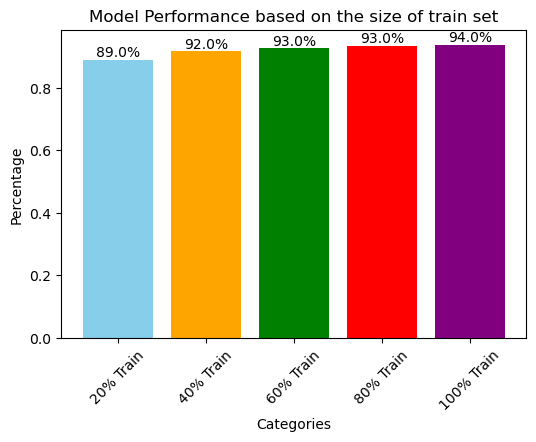

In [39]:
# Categories representing different training set sizes
categories = ['20% Train', '40% Train', '60% Train', '80% Train', '100% Train']

# Colors for the bars in the bar chart
colors = ['skyblue', 'orange', 'green', 'red', 'purple']

# Create a bar chart with specified categories, average scores, and colors
plt.figure(figsize=(6, 4))
bars = plt.bar(categories, avg_list, color=colors)

# Display percentage values on top of the bars
count = 0
for bar in bars:
    yval = bar.get_height()
    # Display rounded percentage values on the bars
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{rounded_numbers[count]}%', ha='center', va='bottom', fontsize=10)
    count += 1

# Labeling the axes and setting the title for the chart
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Model Performance based on the size of train set')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the bar chart
plt.show()